dataset : https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

In [ ]:
!pip install latexify-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.2 MB/s eta 0:00:00


In [ ]:
import math
import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import latexify
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive




#  **Latar Belakang**



Proyek ini bertujuan untuk menganalisis faktor-faktor yang mempengaruhi kinerja akademik siswa dalam ujian. Dengan memahami hubungan antara kinerja siswa dan faktor-faktor seperti jenis kelamin, ras/etnis, tingkat pendidikan orang tua, jenis makan siang, dan persiapan ujian, kita dapat memberikan wawasan yang berguna bagi pendidik dan pembuat kebijakan untuk meningkatkan hasil belajar siswa.



#  **A. EDA**



In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Big Data/Final Project/StudentsPerformance.csv')
print(df.head())
df.info()
df.describe()

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtyp

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


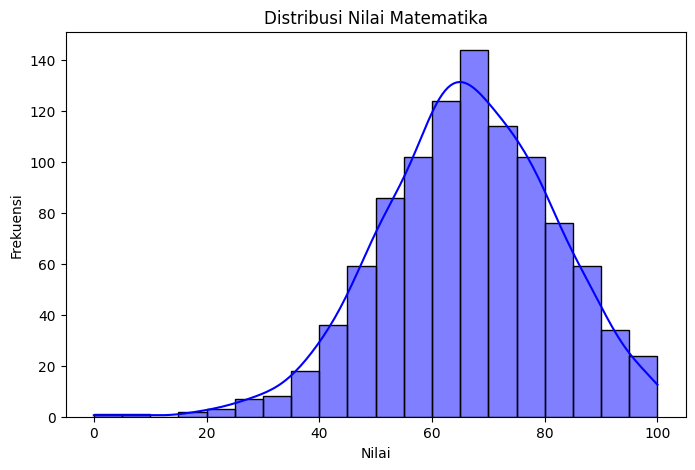

In [ ]:
# Histogram distribusi nilai matematika
plt.figure(figsize=(8, 5))
sns.histplot(df['math score'], bins=20, kde=True, color='blue')
plt.title('Distribusi Nilai Matematika')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

<ipython-input-8-2cec78f06ee4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='parental level of education', data=df, palette='viridis')


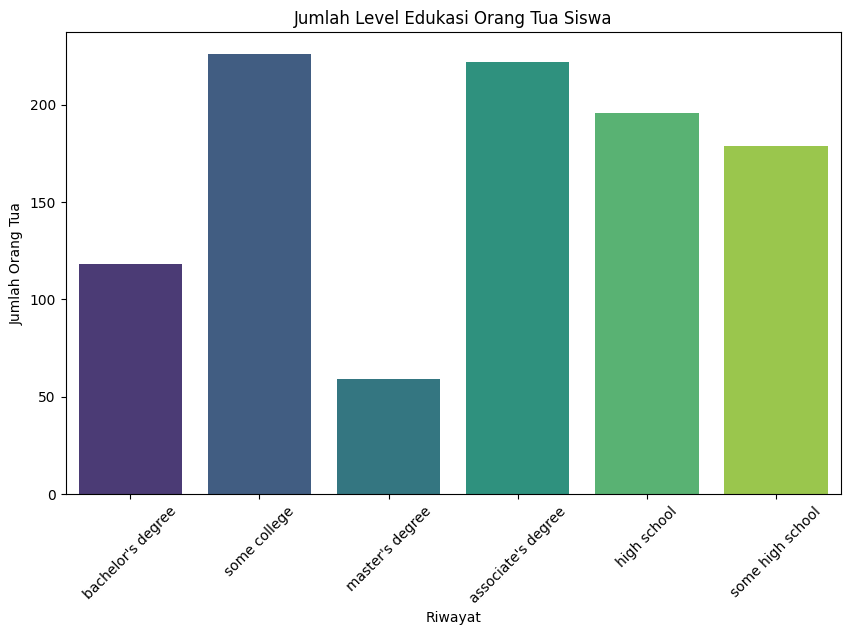

In [ ]:
# Count plot untuk variabel kategorikal
plt.figure(figsize=(10, 6))
sns.countplot(x='parental level of education', data=df, palette='viridis')
plt.title('Jumlah Level Edukasi Orang Tua Siswa')
plt.xlabel('Riwayat')
plt.ylabel('Jumlah Orang Tua')
plt.xticks(rotation=45)
plt.show()



#  **B. Pre-processing**



###Mencari Missing Value

In [ ]:
print(df.isnull().sum())

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


####Mencari Data Duplikat

In [ ]:
# Mengidentifikasi data duplikat
duplicate_rows = df[df.duplicated()]

print("\nData Duplikat:")
print(duplicate_rows)



Data Duplikat:
Empty DataFrame
Columns: [gender, race/ethnicity, parental level of education, lunch, test preparation course, math score, reading score, writing score]
Index: []


In [ ]:
# Menghapus duplikat
df = df.drop_duplicates()

# Menangani outlier pada kolom 'math score' dengan menghapus nilai di atas 100
df = df[df['math score'] <= 100]

print("\nSetelah menghapus duplikat dan outlier pada 'math score':")
print(df)



Setelah menghapus duplikat dan outlier pada 'math score':
     gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0   

####Menghilangkan Outliers

In [ ]:
from scipy.stats.mstats import winsorize

# Contoh untuk variabel 'math score', mengatur batas pengurangan outlier sebesar 5% dari kedua ujung (batas atas dan bawah)
df['math score_winsorized'] = winsorize(df['math score'], limits=[0.05, 0.05])


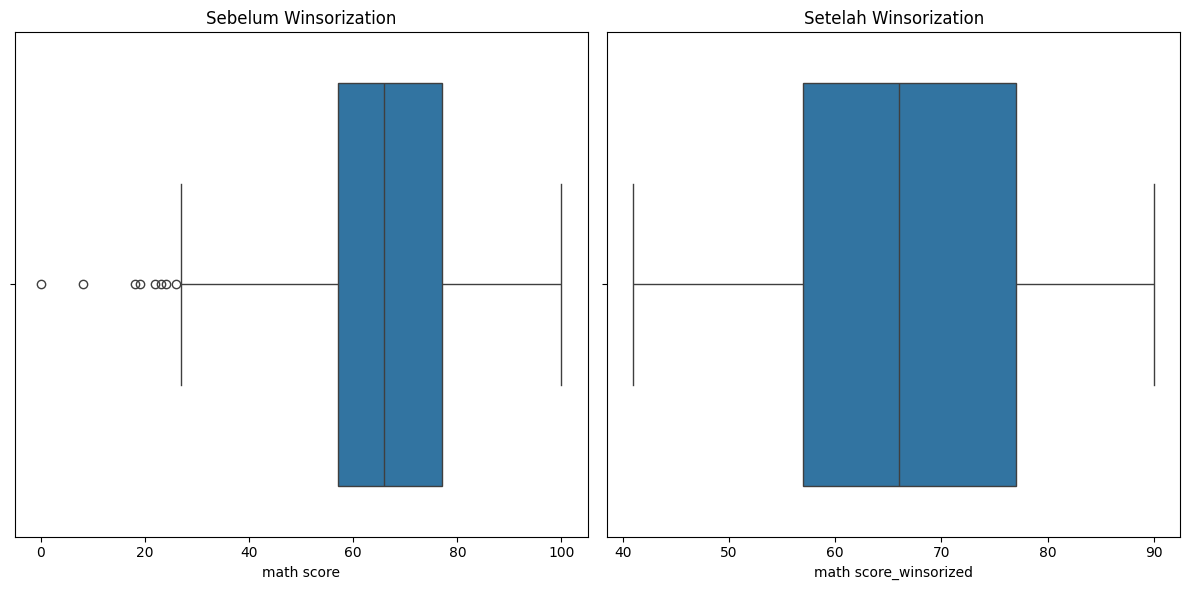

In [ ]:
# Membandingkan distribusi sebelum dan sesudah winsorization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot distribusi sebelum winsorization
plt.subplot(1, 2, 1)
sns.boxplot(x=df['math score'])
plt.title('Sebelum Winsorization')

# Plot distribusi sesudah winsorization
plt.subplot(1, 2, 2)
sns.boxplot(x=df['math score_winsorized'])
plt.title('Setelah Winsorization')

plt.tight_layout()
plt.show()



#  **C. Korelasi Koefisien**



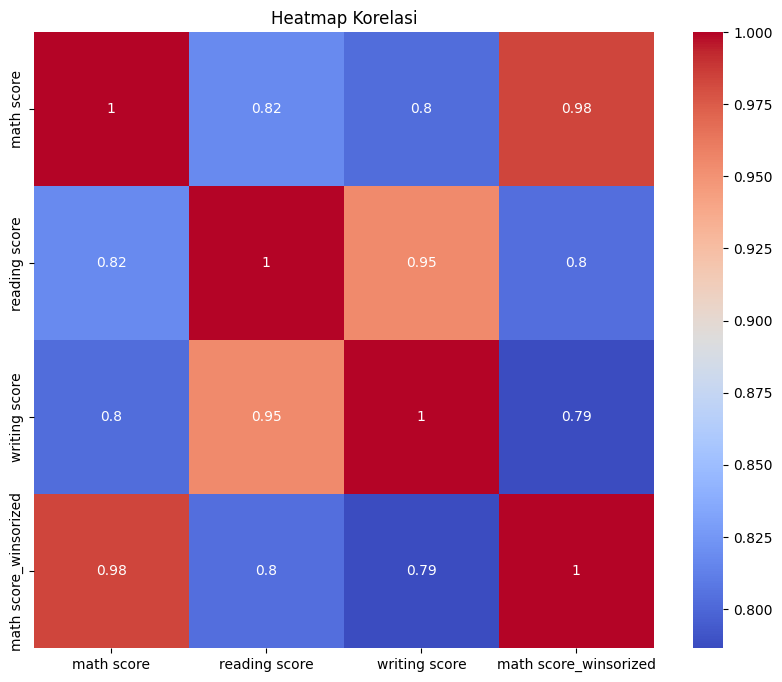

In [ ]:
# Memilih kolom bertipe data integer
int_columns = df.select_dtypes(include=['int64']).columns

# Plot heatmap untuk kolom integer
plt.figure(figsize=(10, 8))
sns.heatmap(df[int_columns].corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi')
plt.show()


In [ ]:
x = df['math score']
y = df['reading score']
n = df['math score'].count()

@latexify.function
def pearson(x,y,n):
  return (n*np.sum(x*y)-np.sum(x)*np.sum(y))/(np.sqrt((n*np.sum(x**2)-np.sum(x)**2)*(n*np.sum(y**2)-np.sum(y)**2)))

pearson

In [ ]:
pearson(x, y, n)

0.817579663672054

# **D. Analisis Faktor Pengaruh Tingkat Pendidikan Terakhir Orangtua Terhadap Nilai Matematika**

In [ ]:
df_encoded = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])

In [ ]:
mean_math_scores = df.groupby('parental level of education')['math score'].mean().reset_index()
print(mean_math_scores)


  parental level of education  math score
0          associate's degree   67.882883
1           bachelor's degree   69.389831
2                 high school   62.137755
3             master's degree   69.745763
4                some college   67.128319
5            some high school   63.497207


<ipython-input-19-d5368473797b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y='math score', data=df, palette='viridis')


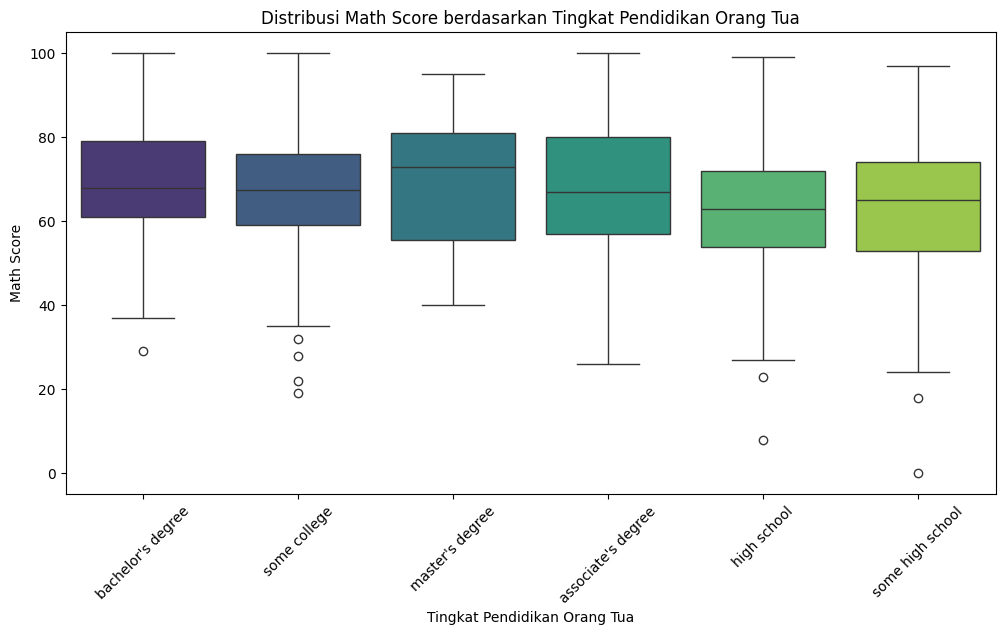

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='parental level of education', y='math score', data=df, palette='viridis')
plt.title('Distribusi Math Score berdasarkan Tingkat Pendidikan Orang Tua')
plt.xlabel('Tingkat Pendidikan Orang Tua')
plt.ylabel('Math Score')
plt.xticks(rotation=45)
plt.show()

# **E. REGRESI LINEAR**

### REGRESI B

In [ ]:
@latexify.function
def b(x,y,n):
  return (np.sum(x*y)-n*np.mean(y)*np.mean(x))/(np.sum(x**2)-n*(np.mean(x))**2)

b

In [ ]:
B = b(df['math score'],df['reading score'], n)

print("Regresi B: ", B)

Regresi B:  0.7872292395756434


### REGRESI A

In [ ]:
@latexify.function
def a(x,y):
  return np.mean(y)-B*np.mean(x)
a

In [ ]:
A = a(df['reading score'],df['writing score'])

print("Regresi A: ", A)

Regresi A:  13.602140727792325


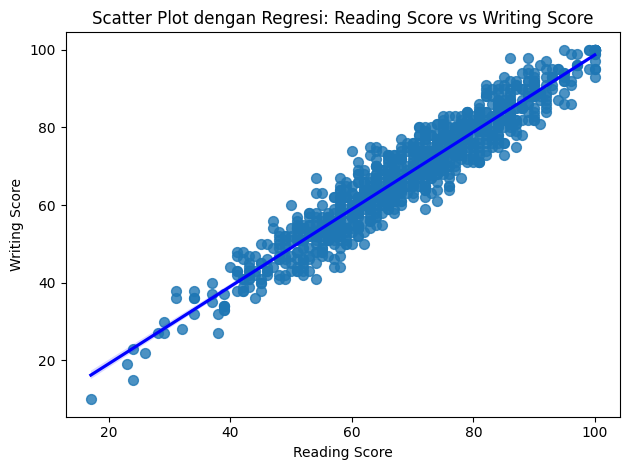

In [ ]:
# Plot untuk 'reading score' vs 'writing score'
plt.subplot(1, 1, 1)
sns.regplot(x='reading score', y='writing score', data=df, scatter_kws={'s':50}, line_kws={'color':'blue'})
plt.title('Scatter Plot dengan Regresi: Reading Score vs Writing Score')
plt.xlabel('Reading Score')
plt.ylabel('Writing Score')

plt.tight_layout()
plt.show()


# F. **Model Prediksi**

In [ ]:
# Memilih lebih banyak fitur
X = df[['math score', 'writing score']]  # Menambahkan 'writing score' sebagai fitur tambahan
y = df['reading score']  # Variabel dependen (target)

# Memisahkan data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat objek model regresi linear
model = LinearRegression()

# Melatih model dengan data pelatihan
model.fit(X_train, y_train)

# Memprediksi nilai 'reading score' menggunakan data pengujian
y_pred = model.predict(X_test)

# Evaluasi kinerja model menggunakan mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with additional features: {mse}")

# Meminta input dari pengguna
math_score = float(input("Masukkan nilai math score: "))
writing_score = float(input("Masukkan nilai writing score: "))

# Menggunakan input pengguna untuk memprediksi nilai 'reading score'
new_scores = pd.DataFrame([[math_score, writing_score]], columns=['math score', 'writing score'])
predicted_reading_score = model.predict(new_scores)
print(f"Predicted Reading Score for Math Score {math_score} and Writing Score {writing_score}: {predicted_reading_score[0]}")

Mean Squared Error with additional features: 19.855874687727248
Masukkan nilai math score: 72
Masukkan nilai writing score: 99
Predicted Reading Score for Math Score 72.0 and Writing Score 99.0: 95.09883846223573


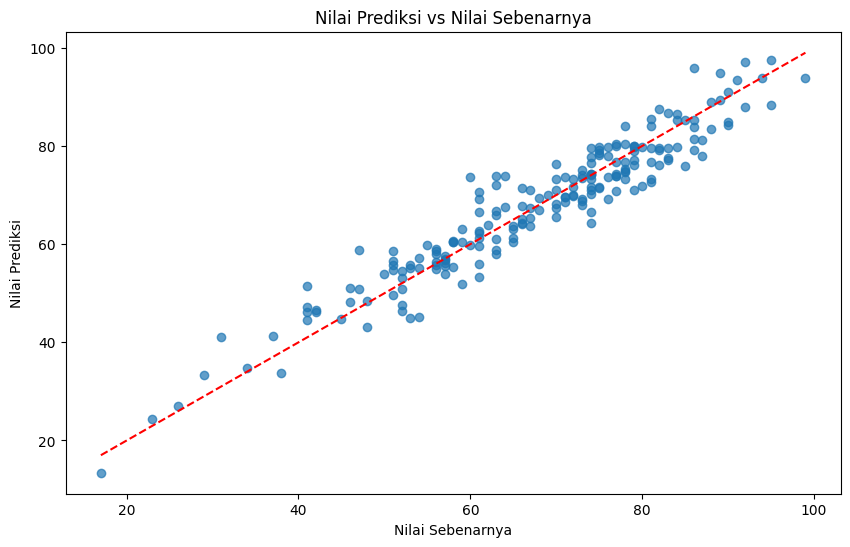

In [ ]:
# Scatter plot nilai prediksi vs nilai sebenarnya
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Nilai Sebenarnya')
plt.ylabel('Nilai Prediksi')
plt.title('Nilai Prediksi vs Nilai Sebenarnya')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # Garis y=x
plt.show()


#RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

data = pd.DataFrame(df)

# Encoding categorical variables
data = pd.get_dummies(data, drop_first=True)

In [ ]:
# Features and target variable
X = data.drop('math score', axis=1)  # Features
y = data['math score']  # Target variable

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Create the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Predicting on test data
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'R-squared: {r2:.4f}')


Mean Squared Error: 2.7812
R-squared: 0.9886
